7.9 #2abc (6), #3 (3)
7.9 #6a(5)

##Exercise 6

In [64]:
d = 10
library(ISLR)
library(boot)
poly.cv.error = matrix(nrow = d, ncol = 2)
different.d = as.list(1:10)
for(i in 1:d){
    wage.pm = glm(wage~poly(age, i), data = Wage)
    poly.cv.error[i,2] = cv.glm(Wage, wage.pm, K = 10)$delta[2]
    different.d[[i]] = wage.pm
    }
poly.cv.error                  

NA,1676.753
NA,1602.724
NA,1595.589
NA,1595.067
NA,1594.75
NA,1597.002
NA,1593.856
NA,1592.469
NA,1593.775
NA,1595.784


In [68]:
anova(different.d[[1]], different.d[[2]],different.d[[3]],different.d[[4]],different.d[[5]],
     different.d[[6]], different.d[[7]],different.d[[8]],different.d[[9]],different.d[[10]])

,Resid. Df,Resid. Dev,Df,Deviance
1,2998,5022216,NA,NA
2,2997,4793430,1,228786
3,2996,4777674,1,15755.69
4,2995,4771604,1,6070.152
5,2994,4770322,1,1282.563
6,2993,4766389,1,3932.258
7,2992,4763834,1,2555.281
8,2991,4763707,1,126.669
9,2990,4756703,1,7004.317
10,2989,4756701,1,2.637537


###Part B

##Exercise 9

###Part A

In [40]:
library(MASS)

In [50]:
nox.nlm = lm(nox~poly(dis,3),data = Boston)
summary(nox.nlm)


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


###Part B

In [49]:
for(i in 1:10){
    nox.nlm = lm(nox~poly(dis,i),data = Boston)
    statement = paste(c("For a polynomial of", as.character(i), "The RSS is",as.character(sum(nox.nlm$residuals^2))))
    print(statement)
    }

[1] "For a polynomial of" "1"                   "The RSS is"         
[4] "2.76856285896928"   
[1] "For a polynomial of" "2"                   "The RSS is"         
[4] "2.03526186893526"   
[1] "For a polynomial of" "3"                   "The RSS is"         
[4] "1.93410670717907"   
[1] "For a polynomial of" "4"                   "The RSS is"         
[4] "1.93298132729859"   
[1] "For a polynomial of" "5"                   "The RSS is"         
[4] "1.9152899610843"    
[1] "For a polynomial of" "6"                   "The RSS is"         
[4] "1.87825729850816"   
[1] "For a polynomial of" "7"                   "The RSS is"         
[4] "1.84948361458298"   
[1] "For a polynomial of" "8"                   "The RSS is"         
[4] "1.83562968906769"   
[1] "For a polynomial of" "9"                   "The RSS is"         
[4] "1.8333308044916"    
[1] "For a polynomial of" "10"                  "The RSS is"         
[4] "1.83217112393138"   


##Exercise 11

###Part A

In [27]:
esp = rnorm(100)
x1 = rnorm(100)
x2 = rnorm(100)
y = x1 + 2*x2 + esp

###Part B

In [28]:
beta1 = 14

###Part C

In [29]:
a=y-beta1*x1
beta2=lm(a~x2)$coef[2]

###Part D

In [30]:
a=y-beta2*x2
beta1=lm(a~x1)$coef[2]
beta0=lm(a~x1)$coef[1]

###Part E

In [31]:
beta1s = rep(beta1,1000)
beta2s = rep(beta2,1000)
beta0s = rep(beta0,1000)
for(i in 2:1000){
    a=y-beta1*x1
    beta2=lm(a~x2)$coef[2]
    beta2s[i] = beta2
    a=y-beta2*x2
    beta1=lm(a~x1)$coef[2]
    beta1s[i] = beta1
    beta0=lm(a~x1)$coef[1]
    beta0s[i] = beta0
    }


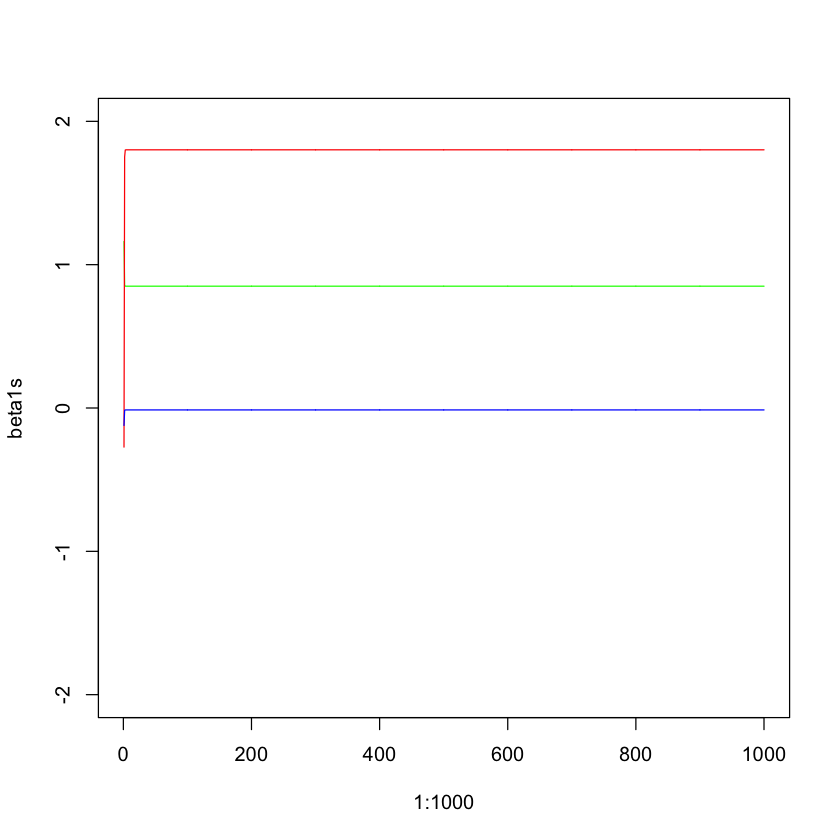

In [36]:
plot(x= 1:1000, y = beta1s, ylim = c(-2,2),col = "green",type = "l")
lines(x= 1:1000, y = beta2s,col = "red")
lines(x= 1:1000, y = beta0s,col = "blue")

###Part F

In [51]:
master.nlm = lm(y~x1+x2)